In [229]:
import json

import pandas as pd
import altair as alt

In [230]:
mit = pd.read_csv("Mit UI.csv", dtype={0:str})
ohne = pd.read_csv("Ohne UI.csv", dtype={0:str})
demo = pd.read_csv("Demografische Daten.csv", dtype={1: str})

In [231]:
mit.head()

,Kürzel,"Es war einfach zu verstehen, wie Aktionen im Spiel auszuführen sind.",Die Aktionen zur Spielsteuerung waren für mich klar,Ich fand das Spiel war leicht zu bedienen,Ich habe das Gesamtziel des Spiels verstanden,Die Ziele des Spiels waren für mich klar verständlich,Ich habe meine Aufgaben im Spiel verstanden,Das Spiel war weder zu einfach noch zu schwierig,"Das Spiel war herausfordernd, aber nicht zu sehr",Der Schwierigkeitsgrad des Spiels war für mich angemessen,...,"Ich war mir meiner direkten Umgebung nicht mehr bewusst, während ich spielte",Ich war in das Spiel vertieft,Ich war voll auf das Spiel konzentriert,"Ich hatte das Gefühl, das Spiel auf meine eigene Art spielen zu können","Ich hatte das Gefühl, die Wahl zu haben, wie ich das Spiel spielen wollte","Ich hatte das Gefühl, das Spiel so spielen zu können, wie ich es wollte",Die UI Anzeige hat mir beim Verständnis der Spielmechaniken geholfen,Das Spiel hat sich durch die UI Anzeige einfacher angefühlt,"Die UI Anzeige hat dazu geführt, dass ich mich mehr auf das Spiel konzentrieren konnte",Die Metronom Tonspur hat das Spiel einfacher gemacht
0,053332,6,4,6,6,6,6,5,5,5,...,4,6,5,4,4,4,5,6,6,6
1,510049,5,5,6,5,5,6,0,0,1,...,5,5,5,2,2,2,4,4,2,5
2,807289,6,6,6,4,4,4,3,3,3,...,3,3,3,2,2,2,0,4,0,4
3,071225,4,6,6,6,5,6,5,5,6,...,6,5,5,5,1,1,5,5,6,5
4,975229,6,6,5,6,6,6,6,6,6,...,4,4,5,4,1,3,5,4,3,6


In [232]:
demo.head(20)

,Zeitstempel,Geben Sie ihr zufälliges Kürzel an,Unter welchem Geschlecht ordnen Sie sich ein?,Wie alt sind Sie?,Wie oft spielen Sie Videospiele,Sie sind sehr gut in dem Umgang mit Computern geübt,Welche Geräte verwenden Sie zum Spielen digitaler Spiele?,Wie oft spielen Sie nicht digitale Spiele (Karten oder Brettspiele)?,Erster Durchlauf
0,13.01.2026 12:26:58,071225,Männlich,18-24,fast täglich,6,"PC, Handheld Konsole, Smartphone / Tablet",ca. 1-2 Mal pro Monat,X
1,13.01.2026 14:15:13,975229,Männlich,25-30,fast täglich,5,"PC, Handheld Konsole",ca. 1-2 Mal pro Monat,X
2,17.01.2026 14:55:24,356499,Männlich,18-24,fast täglich,4,"PC, Handheld Konsole, Playstation/Xbox, Smartp...",ca. 1-2 Mal pro Monat,X
3,09.01.2026 19:41:44,053332,Weiblich,18-24,fast täglich,4,PC,ca. 1-2 Mal pro Monat,NaN
4,10.01.2026 16:55:27,510049,Männlich,18-24,fast täglich,6,"PC, Smartphone / Tablet",Wöchentlich,NaN
5,16.01.2026 13:45:04,807289,Männlich,18-24,fast täglich,6,PC,Gar nicht,NaN
6,22.01.2026 10:47:12,870227,Männlich,25-30,fast täglich,6,PC,ca. 1-2 Mal pro Monat,X
7,22.01.2026 12:58:31,297088,Männlich,18-24,fast täglich,5,PC,ca. 1-2 Mal pro Monat,X
8,22.01.2026 20:07:05,232962,Männlich,18-24,fast täglich,5,"PC, Handheld Konsole",ca. 1-2 Mal pro Monat,NaN
9,22.01.2026 21:20:12,199195,Männlich,18-24,fast täglich,5,PC,Wöchentlich,NaN


In [233]:
OUTLIER = {"053332", "199195"}
IGNORE_SCENES = {"Lobby", "Tutorial"}

In [234]:
mit.info()

<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 35 columns):
 #   Column                                                                                         Non-Null Count  Dtype
---  ------                                                                                         --------------  -----
 0   Kürzel                                                                                         10 non-null     str  
 1   Es war einfach zu verstehen, wie Aktionen im Spiel auszuführen sind.                           10 non-null     int64
 2   Die Aktionen zur Spielsteuerung waren für mich klar                                            10 non-null     int64
 3   Ich fand das Spiel war leicht zu bedienen                                                      10 non-null     int64
 4   Ich habe das Gesamtziel des Spiels verstanden                                                  10 non-null     int64
 5   Die Ziele des Spiels waren für mich klar verständl

In [235]:
long_name = mit.columns[1]

temp_df = mit[[long_name]].copy()
temp_df.columns = ['score']
chart = alt.Chart(temp_df).mark_boxplot(extent='min-max').encode(
    y=alt.Y('score:Q',
            scale=alt.Scale(domain=[3, 6]), # Force scale to show 1-6
            title="Antwort-Skala")
).properties(
    width=200,
    title=f"{long_name}..."
)

chart.display()


alt.Chart(...)

In [236]:
# 1. Select the columns you want to compare (e.g., index 1 to 6)
# We use .iloc to select by index position
cols_to_compare = mit.columns[1:]
subset = mit[cols_to_compare]

# 2. "Melt" the data: This turns columns into rows
# 'var_name' becomes the new column for the Questions
# 'value_name' becomes the new column for the 1-6 Scores
melted_df = subset.melt(var_name='Frage', value_name='Score')

# 3. Create the multi-column Boxplot
chart = alt.Chart(melted_df).mark_boxplot(extent='min-max').encode(
    x=alt.X('Frage:N',
            axis=alt.Axis(labels=False), # Hides the long sentences on the X-axis
            title="Fragen (Vergleich)"),
    y=alt.Y('Score:Q',
            scale=alt.Scale(domain=[0, 6]),
            title="Antwort-Skala (1-6)"),
    color=alt.Color('Frage:N', legend=alt.Legend(title="Fragen-Index", labelLimit=300)),
    tooltip=['Frage', 'Score'] # Hover to see the full question and value
).properties(
    width=500,
    height=400,
    title="Vergleich der Spielerfahrung"
)

chart.display()

alt.Chart(...)

In [237]:
def aggregate_by_catergory(df):# Define your categories
    categories = [
        "EaseOfControl", "GoalsAndRules", "Challange", "ProgressFeedback",
        "AudiovisualAppeal", "Meaning", "Curiosity", "Mastery",
        "Immersion", "Autonomie", "UI"
    ]

    # Create a new empty DataFrame
    df_aggregated = pd.DataFrame()
    df_aggregated["id"] = df["Kürzel"]

    # Loop through and average every 3 columns
    for i, cat in enumerate(categories):
        start_col = (i * 3) + 1  # +1 because index 0 is 'Kürzel'

        if cat == "UI":
            # For the last category, we take everything from 31 to the end
            df_aggregated[cat] = df.iloc[:, start_col:].mean(axis=1)
        else:
            # Take exactly 3 columns and average them
            end_col = start_col + 3
            df_aggregated[cat] = df.iloc[:, start_col:end_col].mean(axis=1)

    # Resulting dataframe has 6 rows (one per participant) and 11 category columns
    return df_aggregated

In [238]:
df_aggregated_mit = aggregate_by_catergory(mit)
df_aggregated_ohne = aggregate_by_catergory(ohne)

In [239]:
df_aggregated_mit

,id,EaseOfControl,GoalsAndRules,Challange,ProgressFeedback,AudiovisualAppeal,Meaning,Curiosity,Mastery,Immersion,Autonomie,UI
0,053332,5.333333,6.000000,5.000000,2.666667,5.000000,4.000000,4.000000,2.333333,5.000000,4.000000,5.75
1,510049,5.333333,5.333333,0.333333,5.000000,3.666667,5.333333,6.000000,6.000000,5.000000,2.000000,3.75
2,807289,6.000000,4.000000,3.000000,2.666667,4.000000,2.000000,4.000000,2.000000,3.000000,2.000000,2.00
3,071225,5.333333,5.666667,5.333333,5.333333,3.666667,1.333333,3.000000,5.333333,5.333333,2.333333,5.25
4,975229,5.666667,6.000000,6.000000,6.000000,2.666667,3.000000,4.000000,4.666667,4.333333,2.666667,4.50
5,356499,4.333333,5.000000,5.000000,4.000000,3.666667,3.000000,3.666667,5.000000,3.333333,4.000000,4.75
6,870227,5.333333,6.000000,6.000000,6.000000,4.000000,3.000000,4.666667,6.000000,2.000000,1.333333,6.00
7,297088,6.000000,6.000000,6.000000,3.000000,5.000000,4.000000,5.333333,4.666667,6.000000,4.000000,4.75
8,232962,5.333333,5.000000,1.666667,4.666667,5.333333,1.333333,3.000000,5.333333,1.333333,5.333333,4.25
9,199195,6.000000,6.000000,6.000000,5.333333,5.000000,3.666667,5.333333,3.333333,5.666667,4.000000,3.25


In [240]:
def visualize_boxplotted(df):
    cols_to_compare = df.columns[1:]
    subset = df[cols_to_compare]
    melted_df = subset.melt(var_name='Frage', value_name='Score')

    # 1. Base Chart: Define the common data and encoding
    base = alt.Chart(melted_df).encode(
        x=alt.X('Frage:N', axis=alt.Axis(labels=False), title="Fragen (Vergleich)"),
        color=alt.Color('Frage:N', legend=alt.Legend(title="Fragen-Index", labelLimit=300))
    )

    # 2. Boxplot Layer
    boxplot = base.mark_boxplot(extent='min-max').encode(
        y=alt.Y('Score:Q', scale=alt.Scale(domain=[0, 6]), title="Antwort-Skala (1-6)"))

    # 3. Mean Layer: Use 'mean(Score)' to let Altair do the math
    mean_points = base.mark_point(
        shape='cross',
        size=50,
        filled=True
    ).encode(
        y='mean(Score):Q',
        color=alt.value('black'),
        tooltip=[
            alt.Tooltip('Frage:N', title='Frage'),
            alt.Tooltip('mean(Score):Q', title='Durchschnitt', format='.2f') # Rounds to 2 decimal places
        ]
    )

    # 4. Combine them using the + operator
    chart = (boxplot + mean_points).properties(
        width=500,
        height=400,
        title="Vergleich der Spielerfahrung"
    )

    chart.display()


In [241]:
visualize_boxplotted(df_aggregated_mit)

alt.LayerChart(...)

In [242]:
visualize_boxplotted(df_aggregated_ohne)

alt.LayerChart(...)

In [243]:
import os
import re
import json
from collections import defaultdict

def get_grouped_stats_data(root_dir):
    """
    Returns a dictionary grouped by {participant_id: {category: [sorted_file_contents]}}
    Files are sorted by the 'playTime' field inside the JSON.
    """
    # Temporary storage for filtered "latest" files
    # Structure: (p_id, category, content_dict)
    all_selected_data = []

    for root, dirs, files in os.walk(root_dir):
        folder_name = os.path.basename(root)
        if not ('_mit' in folder_name or '_ohne' in folder_name):
            continue

        p_id, category = folder_name.split('_')

        # 1. Standardize to find the latest stats_<name>_<number>
        for filename in files:
            file_path = os.path.join(root, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    all_selected_data.append({
                        'p_id': p_id,
                        'category': category,
                        'data': data,
                        # 'playTime': data.get('playTime', 0) # Use 0 if missing
                    })
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    # 3. Sort everything by playTime first
    # all_selected_data.sort(key=lambda x: x['playTime'])

    # 4. Group by Participant ID and then Category
    grouped_results = defaultdict(lambda: defaultdict(list))

    for entry in all_selected_data:
        # We store the data back as a JSON string to match your requirement
        content_string = json.dumps(entry['data'])
        grouped_results[entry['p_id']][entry['category']].append(entry['data'])


    for (key1, group) in grouped_results.items():
        for (key2, value) in group.items():
            grouped_results[key1][key2].sort(key=lambda x: x['playTime'])

    for (key, value) in grouped_results.items():
        for (inner_key, inner_value) in value.items():
            if inner_key == 'mit' or inner_key == 'ohne':
                new_list = []
                last_room = None
                last_obj = None
                for entry in inner_value:
                    if last_room != entry["sceneName"] and last_obj is not None:
                        new_list.append(last_obj)
                    last_room = entry["sceneName"]
                    last_obj = entry
                if last_obj is not None:
                    new_list.append(last_obj)

                value[inner_key] = new_list


    # Compute differences
    for (key, value) in grouped_results.items():
        for (inner_key, inner_value) in value.items():
            if inner_key == 'mit' or inner_key == 'ohne':
                last_obj = None
                for entry in inner_value:
                    if last_obj is not None:
                        entry["timeSpend"] = entry["playTime"] - last_obj["playTime"]
                        entry["deathsTaken"] = entry["deaths"] - last_obj["deaths"]
                        entry["hitsTaken"] = entry["hits"] - last_obj["hits"]
                    else:
                        entry["timeSpend"] = entry["playTime"]
                        entry["deathsTaken"] = entry["deaths"]
                        entry["hitsTaken"] = entry["hits"]
                    last_obj = entry
                    # entry["timeSpend"] = entry["playTime"] - entry["diff"]

    return dict(grouped_results)

# --- Usage ---
# final_data = get_grouped_stats_data('./data')
# Example: Accessing participant '053332' in the 'mit' category:
# list_of_json_strings = final_data['053332']['mit']


In [244]:
def group_by_scene(data):

    # {id: mit, ohne: scene: {} }
    new_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 0))))

    for (id, mit_ohne) in data.items():
        for(key, value) in mit_ohne.items():
            for scene_entry in value:
                new_dict[id][key][scene_entry["sceneName"]]["totalDeaths"] = new_dict[id][key][scene_entry["sceneName"]]["totalDeaths"] + scene_entry["deathsTaken"]
                new_dict[id][key][scene_entry["sceneName"]]["totalHits"] = new_dict[id][key][scene_entry["sceneName"]]["totalHits"] + scene_entry["hitsTaken"]
                new_dict[id][key][scene_entry["sceneName"]]["totalTime"] = new_dict[id][key][scene_entry["sceneName"]]["totalTime"] + scene_entry["timeSpend"]

    return new_dict

In [245]:
def recursive_dict(d):
    if isinstance(d, dict): # Catch both dict and defaultdict
        return {k: recursive_dict(v) for k, v in d.items()}
    return d

In [246]:

data_tuples = get_grouped_stats_data("../participant_runs")
# print(data_tuples)
#data_json = []
#for p_id, cat, content in data_tuples:
#    obj = json.loads(content)
#    data_json.append({"id": p_id, "category": cat, "content": obj})
#
#
with open("parsed_files.json", "w") as f:
    json.dump(data_tuples, f, indent=2)

with open("accumulated_scenes.json", "w") as f:
    json.dump(recursive_dict(group_by_scene(data_tuples)), f, indent=2)


In [247]:
import pandas as pd
import json

# 1. Load the data
with open('accumulated_scenes.json', 'r') as f:
    data = json.load(f)

# 2. Flatten the nested structure
flattened_data = []

for user_id, conditions in data.items():
    for condition_name, scenes in conditions.items():
        for scene_name, metrics in scenes.items():
            # Create a single row combining all levels
            row = {
                'user_id': user_id,
                'condition': condition_name, # "mit" or "ohne"
                'scene': scene_name,
                **metrics # Unpacks totalDeaths, totalHits, totalTime
            }
            flattened_data.append(row)

# 3. Create the DataFrame
df = pd.DataFrame(flattened_data)

# Display the first few rows
print(df.head())
df.to_csv("accumulated_scenes.csv")

  user_id condition        scene  totalDeaths  totalHits   totalTime
0  053332       mit     Tutorial            1          1   44.810463
1  053332       mit        Lobby            0          0   28.213287
2  053332       mit  StorageRoom            7          0  148.412758
3  053332       mit  Treppenhaus            7          8  190.478348
4  053332       mit         Boss            5         15  421.148804


In [248]:
def visualize_accumulated(df, with_outliers=False, with_scenes=False):
    # 1. Load the data
    scene_order = ["Tutorial", "Lobby", "Treppenhaus", "StorageRoom", "Boss"]

    df_tmp = df
    if not with_outliers:
        df_tmp = df_tmp[(~df_tmp['user_id'].isin(OUTLIER))]
    if not with_scenes:
        df_tmp = df_tmp[(~df_tmp['scene'].isin(IGNORE_SCENES))]

    # 2. Create the Boxplot layer
    boxplot = alt.Chart(df_tmp).mark_boxplot().encode(
        x=alt.X('condition:N', title=None),
        y=alt.Y('totalTime:Q', title="Time Spent (s)"),
        color=alt.Color('condition:N', title="Bedingung")
    )

    # 3. Create the Mean layer (Crosses)
    mean_points = alt.Chart(df_tmp).mark_point(
        shape='diamond',
        size=40,
        filled=True
    ).encode(
        x=alt.X('condition:N'),
        y=alt.Y('mean(totalTime):Q'),
        color=alt.value('black'),
        tooltip=[
            alt.Tooltip("condition:N", title="Condition"),
            alt.Tooltip("mean(totalTime):Q", title="Total Time", format=".1f")
        ]
    )


    # 2. Create the Boxplot layer
    boxplot_2 = alt.Chart(df_tmp).mark_boxplot().encode(
        x=alt.X('condition:N', title=None),
        y=alt.Y('totalDeaths:Q', title="Deaths Taken"),
        color=alt.Color('condition:N', title="Bedingung")
    )

    # 3. Create the Mean layer (Crosses)
    mean_points_2 = alt.Chart(df_tmp).mark_point(
        shape='diamond',
        size=40,
        filled=True
    ).encode(
        x=alt.X('condition:N'),
        y=alt.Y('mean(totalDeaths):Q'),
        color=alt.value('black'),
        tooltip=[
            alt.Tooltip("condition:N", title="Condition"),
            alt.Tooltip("mean(totalDeaths):Q", title="Total Deaths", format=".1f")
        ]
    )

    # 2. Create the Boxplot layer
    boxplot_3 = alt.Chart(df_tmp).mark_boxplot().encode(
        x=alt.X('condition:N', title=None),
        y=alt.Y('totalHits:Q', title="Hits Taken"),
        color=alt.Color('condition:N', title="Bedingung")
    )

    # 3. Create the Mean layer (Crosses)
    mean_points_3 = alt.Chart(df_tmp).mark_point(
        shape='diamond',
        size=40,
        filled=True
    ).encode(
        x=alt.X('condition:N'),
        y=alt.Y('mean(totalHits):Q'),
        color=alt.value('black'),
        tooltip=[
            alt.Tooltip("condition:N", title="Condition"),
            alt.Tooltip("mean(totalHits):Q", title="Total Hits", format=".1f")
        ]
    )

    # 4. Combine and Facet by Scene
    final_chart1 = (boxplot + mean_points).facet(
        column=alt.Column('scene:N', sort=scene_order, title="")
    ).properties(
        title="Verteilung der Zeit pro Level"
    )
    final_chart2 = (boxplot_2 + mean_points_2).facet(
        column=alt.Column('scene:N', sort=scene_order, title="")
    ).properties(
        title="Verteilung der Tode pro Level"
    )
    final_chart3 = (boxplot_3 + mean_points_3).facet(
        column=alt.Column('scene:N', sort=scene_order, title="")
    ).properties(
        title="Verteilung des Schadens pro Level"
    )


    final_chart = final_chart1 | final_chart2 | final_chart3

    final_chart.display()


In [249]:
visualize_accumulated(df)

alt.HConcatChart(...)

In [250]:
df_with_ui = demo[demo["Erster Durchlauf"] == 'X'][demo.columns[1]].to_frame()
df_without_ui = demo[demo["Erster Durchlauf"] != 'X'][demo.columns[1]].to_frame()
df_with_ui = df_with_ui.rename(columns={df_with_ui.columns[0]:'id'})
df_without_ui = df_without_ui.rename(columns={df_without_ui.columns[0]:'id'})
df_with_ui

,id
0,071225
1,975229
2,356499
6,870227
7,297088


In [251]:
df_accumulated_with_ui = df[(df["user_id"].isin(df_with_ui["id"])) & (df["condition"] == "mit")]
df_accumulated_without_ui = df[(df["user_id"].isin(df_without_ui["id"])) & (df["condition"] == 'ohne')]

In [252]:
df_accumulated_combined = pd.concat([df_accumulated_with_ui, df_accumulated_without_ui])
df_accumulated_combined

,user_id,condition,scene,totalDeaths,totalHits,totalTime
10,071225,mit,Tutorial,1,1,35.274364
11,071225,mit,Lobby,0,0,53.151585
12,071225,mit,Treppenhaus,17,14,187.436417
13,071225,mit,StorageRoom,14,2,163.903168
14,071225,mit,Boss,6,17,368.138397
40,297088,mit,Tutorial,1,2,49.644756
41,297088,mit,Lobby,0,0,25.071186
42,297088,mit,StorageRoom,28,4,243.239624
43,297088,mit,Treppenhaus,11,6,162.087097
44,297088,mit,Boss,5,13,351.555542


In [253]:
visualize_accumulated(df_accumulated_combined, with_outliers=False)

alt.HConcatChart(...)

# Analyse mit fragebogen und daten

In [254]:
df[(df["user_id"].isin(df_with_ui["id"]))].groupby(["user_id", "condition"]).sum().reset_index()

,user_id,condition,scene,totalDeaths,totalHits,totalTime
0,071225,mit,TutorialLobbyTreppenhausStorageRoomBoss,38,34,807.903931
1,071225,ohne,TutorialLobbyTreppenhausStorageRoomBoss,13,13,497.013153
2,297088,mit,TutorialLobbyStorageRoomTreppenhausBoss,45,25,831.598206
3,297088,ohne,TutorialLobbyStorageRoomTreppenhausBoss,24,20,475.137787
4,356499,mit,TutorialLobbyStorageRoomTreppenhausBoss,16,13,478.492920
5,356499,ohne,TutorialLobbyStorageRoomTreppenhausBoss,19,8,457.997772
6,870227,mit,TutorialLobbyStorageRoomTreppenhausBoss,22,31,822.524841
7,870227,ohne,TutorialLobbyStorageRoomTreppenhausBoss,14,22,547.198059
8,975229,mit,TutorialLobbyStorageRoomTreppenhausBoss,14,22,727.291321
9,975229,ohne,TutorialLobbyStorageRoomTreppenhausBoss,10,12,632.258606


In [255]:
import math


def combine_condition_and_times(df, filter_df, aggregated_mit, aggregated_ohne):
    df_aggregated_mit_and_times = pd.merge(df[(df["user_id"].isin(filter_df["id"])) & (df["condition"] == "mit")].groupby(["user_id", "condition"]).sum().reset_index(), aggregated_mit, left_on="user_id", right_on="id").drop(["scene", "user_id", "id"], axis=1)
    df_aggregated_mit_ohne_and_times = pd.merge(df[(df["user_id"].isin(filter_df["id"])) & (df["condition"] == "ohne")].groupby(["user_id", "condition"]).sum().reset_index(), aggregated_ohne, left_on="user_id", right_on="id").drop(["scene", "user_id", "id"], axis=1)
    df_aggregated_mit_and_times = pd.concat([df_aggregated_mit_and_times, df_aggregated_mit_ohne_and_times])
    df_aggregated_mit_and_times["condition"] = df_aggregated_mit_and_times["condition"].apply(lambda x: 1 if x == "mit" else 0)
    df_aggregated_mit_and_times["UI"] = df_aggregated_mit_and_times["UI"].apply(lambda x: -1 if math.isnan(x) else x)
    return df_aggregated_mit_and_times


In [256]:
df_aggregated_mit_first_and_times = combine_condition_and_times(df, df_with_ui, df_aggregated_mit, df_aggregated_ohne)
df_aggregated_ohne_first_and_times = combine_condition_and_times(df, df_without_ui, df_aggregated_mit, df_aggregated_ohne)
df_aggregated_mit_first_and_times

,condition,totalDeaths,totalHits,totalTime,EaseOfControl,GoalsAndRules,Challange,ProgressFeedback,AudiovisualAppeal,Meaning,Curiosity,Mastery,Immersion,Autonomie,UI
0,1,38,34,807.903931,5.333333,5.666667,5.333333,5.333333,3.666667,1.333333,3.000000,5.333333,5.333333,2.333333,5.25
1,1,45,25,831.598206,6.000000,6.000000,6.000000,3.000000,5.000000,4.000000,5.333333,4.666667,6.000000,4.000000,4.75
2,1,16,13,478.492920,4.333333,5.000000,5.000000,4.000000,3.666667,3.000000,3.666667,5.000000,3.333333,4.000000,4.75
3,1,22,31,822.524841,5.333333,6.000000,6.000000,6.000000,4.000000,3.000000,4.666667,6.000000,2.000000,1.333333,6.00
4,1,14,22,727.291321,5.666667,6.000000,6.000000,6.000000,2.666667,3.000000,4.000000,4.666667,4.333333,2.666667,4.50
0,0,13,13,497.013153,6.000000,6.000000,0.000000,6.000000,3.000000,0.000000,0.000000,6.000000,6.000000,4.333333,-1.00
1,0,24,20,475.137787,6.000000,6.000000,6.000000,3.666667,5.666667,3.666667,5.000000,3.333333,6.000000,4.666667,-1.00
2,0,19,8,457.997772,4.000000,5.000000,5.000000,5.000000,4.333333,3.333333,5.000000,4.666667,3.000000,5.000000,-1.00
3,0,14,22,547.198059,6.000000,6.000000,6.000000,6.000000,2.666667,2.333333,2.333333,6.000000,2.000000,4.333333,-1.00
4,0,10,12,632.258606,5.666667,6.000000,6.000000,6.000000,2.666667,4.000000,4.000000,5.000000,4.666667,3.000000,-1.00


<Axes: >

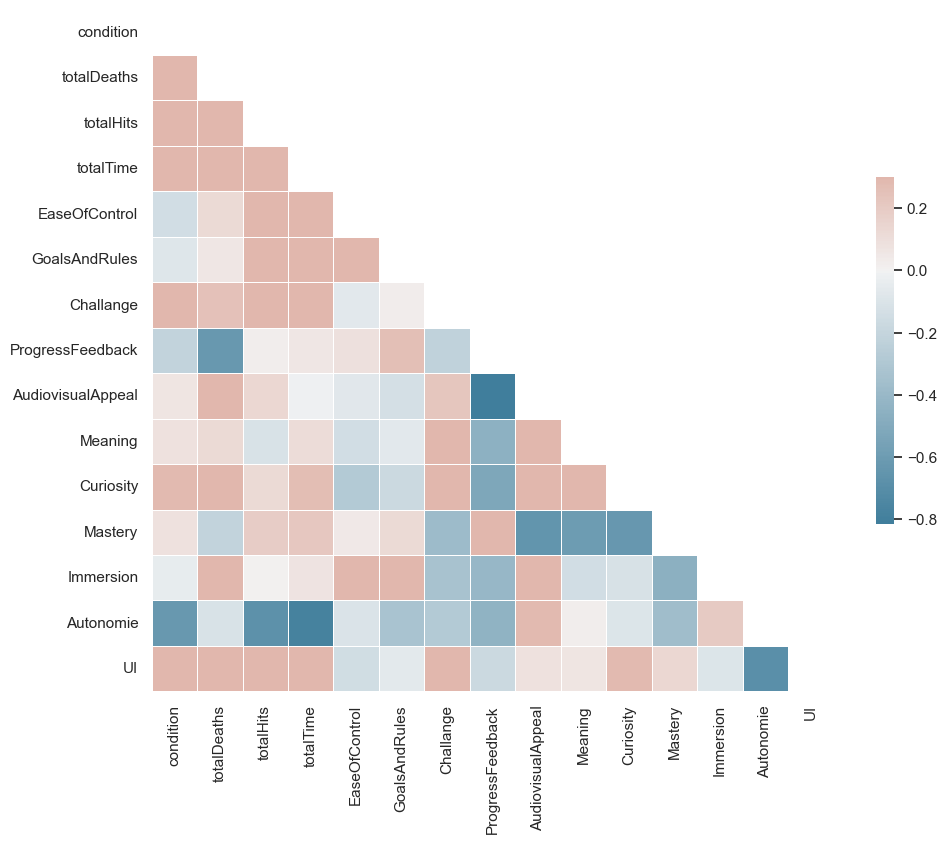

In [257]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_aggregated_mit_first_and_times.corr()
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

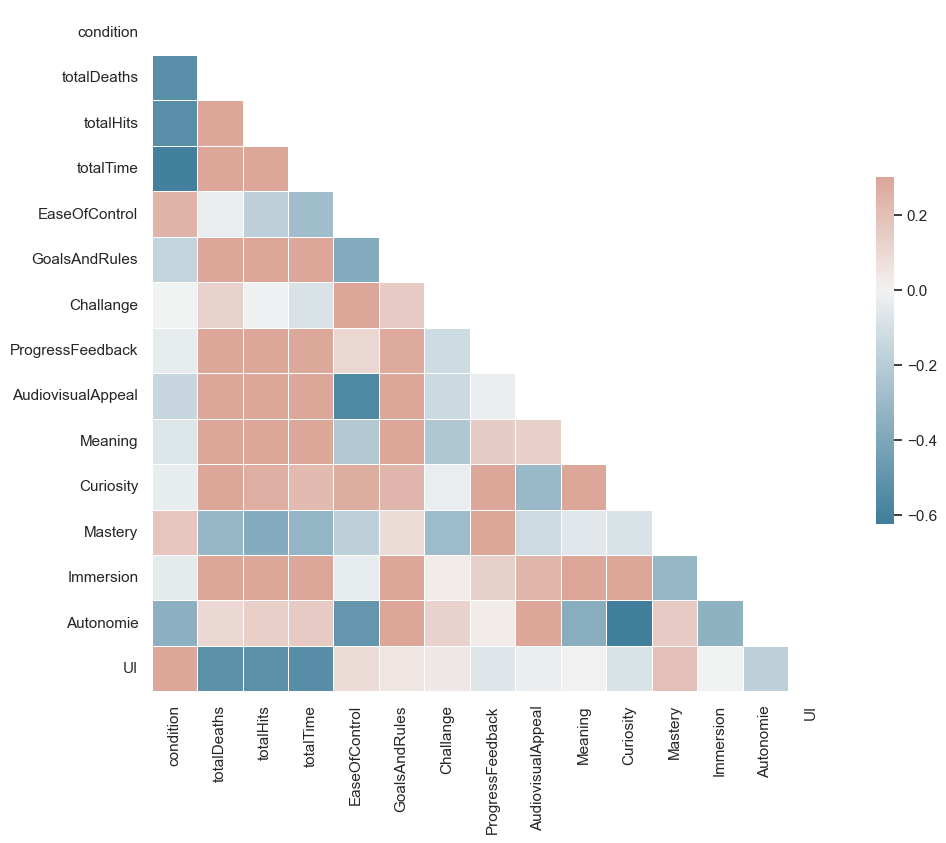

In [258]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_aggregated_ohne_first_and_times.corr()
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<Axes: >

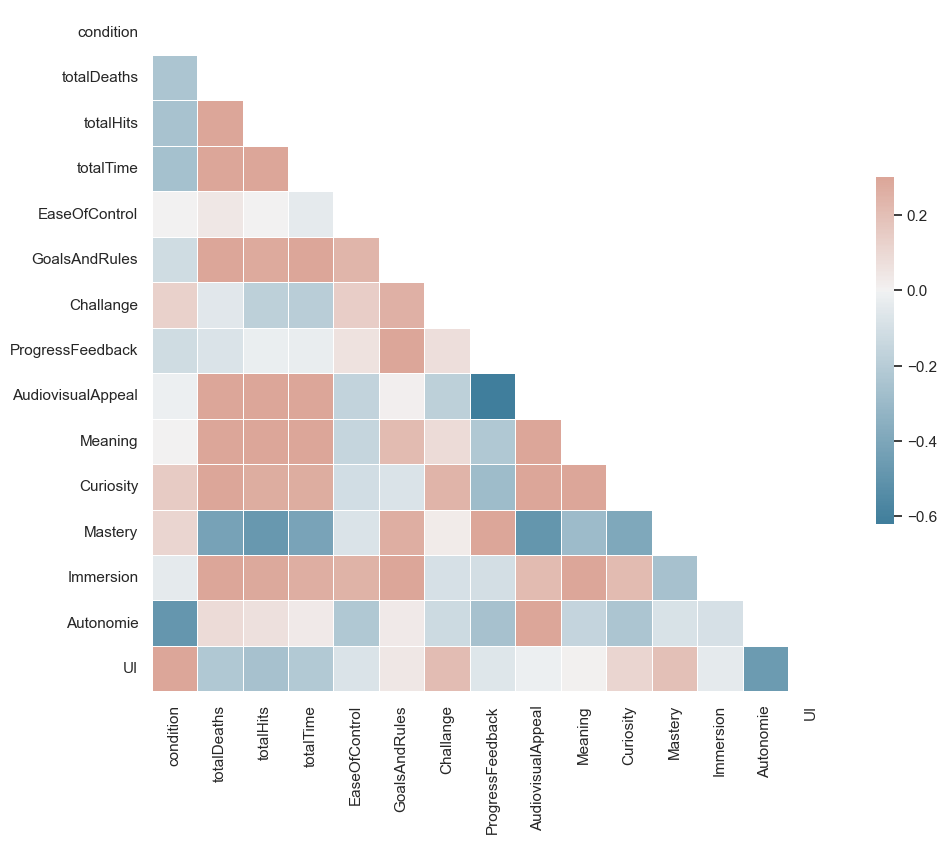

In [259]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = pd.concat([df_aggregated_ohne_first_and_times, df_aggregated_mit_first_and_times]).corr()
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


- with ui on: player felt less autonomy (-0.48)
- With more deaths, hits and total time, player felt that they have mastered the game less (-0.42, -0.48, -0.42)
- with ui on, player had lower deaths, hits and played faster, but only slightly (-0.24, -0.26, -0.26)

In [260]:
pd.concat([df_aggregated_ohne_first_and_times, df_aggregated_mit_first_and_times]).corr()


,condition,totalDeaths,totalHits,totalTime,EaseOfControl,GoalsAndRules,Challange,ProgressFeedback,AudiovisualAppeal,Meaning,Curiosity,Mastery,Immersion,Autonomie,UI
condition,1.000000e+00,-0.236026,-0.255629,-0.264447,-5.929165e-17,-0.119310,0.131077,-0.118678,-0.016925,-9.384083e-17,0.149953,0.116279,-0.041568,-0.483883,0.958911
totalDeaths,-2.360261e-01,1.000000,0.949351,0.926403,3.870242e-02,0.312880,-0.054170,-0.078902,0.491227,3.238251e-01,0.339474,-0.423322,0.382892,0.088741,-0.226264
totalHits,-2.556287e-01,0.949351,1.000000,0.956757,3.467148e-04,0.282944,-0.181537,-0.020023,0.460412,3.039093e-01,0.271356,-0.475622,0.286746,0.067534,-0.257635
totalTime,-2.644473e-01,0.926403,0.956757,1.000000,-4.124501e-02,0.322645,-0.193203,-0.030162,0.418095,3.366034e-01,0.272938,-0.416340,0.266454,0.029567,-0.219223
EaseOfControl,-5.929165e-17,0.038702,0.000347,-0.041245,1.000000e+00,0.237171,0.140976,0.058099,-0.162698,-1.497409e-01,-0.106777,-0.084179,0.246658,-0.227965,-0.078140
GoalsAndRules,-1.193100e-01,0.312880,0.282944,0.322645,2.371715e-01,1.000000,0.254131,0.378766,0.009087,2.133842e-01,-0.083491,0.266367,0.458747,0.034114,0.039805
Challange,1.310771e-01,-0.054170,-0.181537,-0.193203,1.409762e-01,0.254131,1.000000,0.070488,-0.178863,8.831247e-02,0.243645,0.024767,-0.095350,-0.130936,0.209606
ProgressFeedback,-1.186782e-01,-0.078902,-0.020023,-0.030162,5.809859e-02,0.378766,0.070488,1.000000,-0.619657,-2.260652e-01,-0.288446,0.543712,-0.104830,-0.258419,-0.063718
AudiovisualAppeal,-1.692486e-02,0.491227,0.460412,0.418095,-1.626975e-01,0.009087,-0.178863,-0.619657,1.000000,3.375297e-01,0.419182,-0.490821,0.212816,0.441993,-0.016529
Meaning,-9.384083e-17,0.323825,0.303909,0.336603,-1.497409e-01,0.213384,0.088312,-0.226065,0.337530,1.000000e+00,0.822936,-0.292288,0.443003,-0.156630,0.008228
